In [11]:
import sys
sys.path += ['layers']
import numpy as np
from data_utils import get_CIFAR10_data

from init_base_model import init_base_model
from train_custom import train_custom

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data & Partition

In [12]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

### TRAIN DATA TINY
n_train = 100
X_train_tiny = X_train[:,:,:, :n_train]
y_train_tiny = y_train[:n_train]

### TEST/VALIDATION DATA TINY
n_test = 1000
X_test_tiny = X_test[:,:,:,:n_test]
y_test_tiny = y_test[:n_test]

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


### Set Parameters

This is for one run of the model- could create a set of list param files to loop over and pass into a new model.

In [13]:
# SET PARAMS HERE
learning_rate = 1e-4 # already did 1e3
weight_decay = 1e-6
batch_size = 32
live_plot_on = False
itr_to_plot = 50
verbose = True
early_stopping_on = True
calculate_test = True
itr_to_test = 100
numIters = 20000 # already did 10k
save_file = f"\\test_full_base_model_2"

# other params
# save_plot - if you want to save performance plot out (True)
# save path - where to put train model and plot (\results foler)

# PACK INTO PARAMS DICT
params = {
    "learning_rate" :learning_rate, # default 0.01
    "weight_decay":weight_decay ,   # default 0.0005
    "batch_size" : batch_size,      # default 128
    "save_file" : save_file,        # default model
    "live_plot_on" : live_plot_on,
    "itr_to_plot" : itr_to_plot,    # how many iterations until live plot refresh
    "verbose" : verbose,
    "early_stopping_on" : early_stopping_on, # defualt True
    "calculate_test": calculate_test,        # bool for validation checks, default true
    "itr_to_test": itr_to_test,              # n iterations between validation check
    "X_test" : X_test_tiny,                  # validation set, can be empty
    "y_test" : y_test_tiny,                  # validation set, can be empty
    }

### Run Model

In [32]:
model = init_base_model()

Input size:
[32, 32, 3]
Layer 0 output size: 
(28, 28, 3)
Layer 1 output size: 
(14, 14, 3)
Layer 2 output size: 
(14, 14, 3)
Layer 3 output size: 
(588,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


*****Starting training! bs: 32, lr: 0.0001 wd: 1e-06, n_images: 50000, n_test: 1000*****
Fished itr 0 / 20000; cost: 3.22475 train: 0.0625 val: 0.107
Fished itr 1 / 20000; cost: 3.0389 train: 0.0625 val: 0.107
Fished itr 2 / 20000; cost: 3.00182 train: 0.0625 val: 0.107
Fished itr 3 / 20000; cost: 2.66084 train: 0.125 val: 0.107
Fished itr 4 / 20000; cost: 2.68852 train: 0.125 val: 0.107
Fished itr 5 / 20000; cost: 3.27027 train: 0.09375 val: 0.107
Fished itr 6 / 20000; cost: 2.64546 train: 0.125 val: 0.107
Fished itr 7 / 20000; cost: 3.31947 train: 0.125 val: 0.107
Fished itr 8 / 20000; cost: 3.09217 train: 0.09375 val: 0.107
Fished itr 9 / 20000; cost: 3.2282 train: 0.15625 val: 0.107
Fished itr 10 / 20000; cost: 3.25459 train: 0.03125 val: 0.107
Fished itr 11 / 20000; cost: 3.27366 train: 0.0625 val: 0.107
Fished itr 12 / 20000; cost: 3.05956 train: 0.0625 val: 0.107
Fished itr 13 / 20000; cost: 2.95839 train: 0.09375 val: 0.107
Fished itr 14 / 20000; cost: 3.36636 train: 0.09375 va

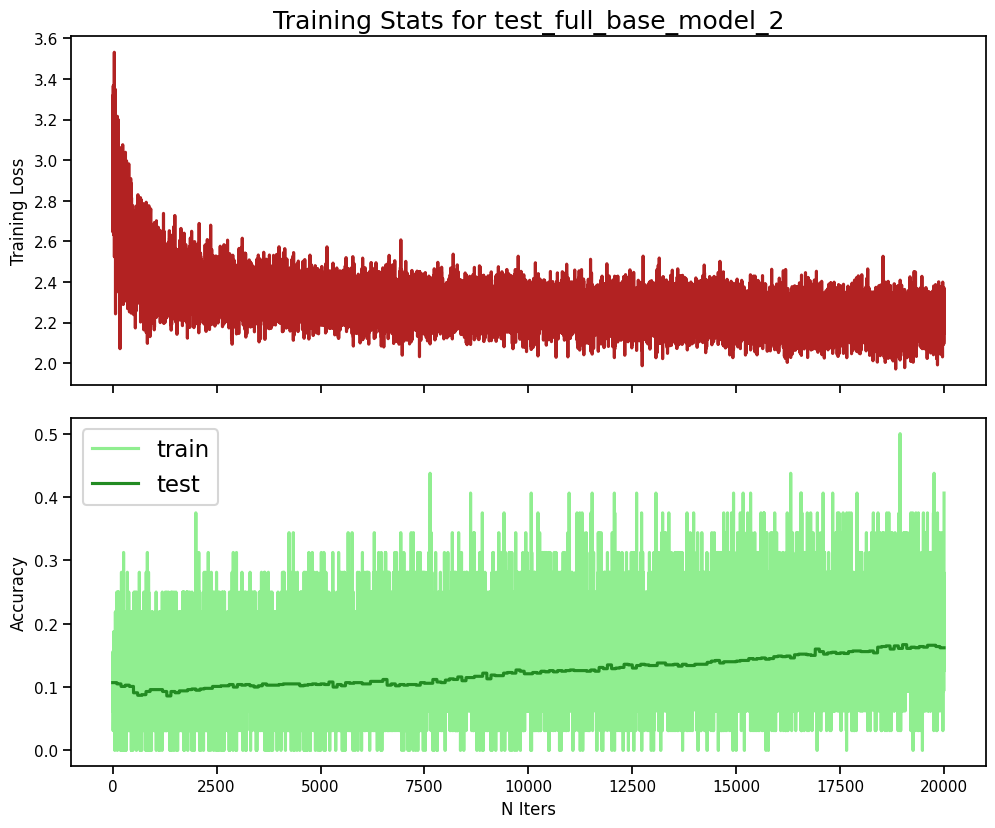

In [33]:
trained_model, loss, accuracy, test_accuracy, time = train_custom(
    model,
    X_train, 
    y_train, 
    params, 
    numIters
    )

In [14]:
try:
    loss
except:
    import pandas as pd

In [19]:
# from utils import make_model_fit_df
# make_model_fit_df(params, loss, accuracy, test_accuracy)
from utils import save_out_model_info
from utils import SAVE_PATH
from utils import test

import pandas as pd

time = 6901.98

try:
    loss
except:
    import pandas as pd
    time = 6901.98
    save_file = params["save_file"]
    model_fit_info_df = pd.read_csv(SAVE_PATH + save_file + '_fit_data.csv')
    loss = model_fit_info_df["loss"]
    accuracy = model_fit_info_df["train_acc"]
    test_accuracy = model_fit_info_df["val_acc"]
    
    trained_model = np.load(SAVE_PATH + save_file + '.npz', allow_pickle=True)
    trained_model = dict(model)

In [20]:
eval_accuracy = test(trained_model, X_test, y_test)

running test on 10000 images
accuracy is 0.187


In [21]:
fit_df, summary_df = save_out_model_info(
    params, 
    loss,
    train_accuracy = accuracy,
    val_accuracy = test_accuracy,
    time=time, 
    save_and_return=True,
    eval_accuracy = eval_accuracy)

\test_full_base_model_2 model fit df saved
\base_model_summary created


In [22]:
summary_df

,learning_rate,weight_decay,batch_size,save_file,numIters,time,eval_acc,loss_min,loss_mean,loss_max,train_acc_min,train_acc_mean,train_acc_max,val_acc_min,val_acc_mean,val_acc_max
0,0.0001,0.000001,32,\test_full_base_model_2,20000,115.03,0.187,1.971422,2.293191,2.293191,0.0,0.14785,0.14785,0.086,0.12416,0.12416


In [25]:
fit_df.describe()

,loss,train_acc,val_acc
count,20000.000000,20000.000000,20000.000000
mean,2.293191,0.147850,0.124160
std,0.120736,0.067042,0.022059
min,1.971422,0.000000,0.086000
25%,2.219526,0.093750,0.104000
50%,2.279180,0.156250,0.123000
75%,2.344743,0.187500,0.141250
max,3.531196,0.500000,0.167000
